In [158]:
import os
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt

In [107]:
file='/Users/jheaton/projects/t81_558_deep_learning/assignments/assignment_yourname_class2.ipynb'

In [115]:
df = pd.read_csv("http://data.heatonresearch.com/data/t81-558/datasets/reg-33-data.csv")

df.drop('id',1,inplace=True)


In [116]:
df.describe()
print(len(df))

10809


In [117]:
df['ratio']=df['max']/df['number']

In [120]:
display(df)

,convention,height,max,cat2,number,usage,region,length,code,power,item,weight,country,target,ratio
0,CO-1A,4284.51,44907,CA-E,16669,US-7,RE-4,12471.1127,CO-B,27351.36,IT-17,13722,CO-1,44098.106769,2.694043
1,CO-C,806.88,48831,CA-A,8652,US-20,RE-15,10035.7085,CO-E,42323.89,IT-1E,33779,CO-0,95567.294044,5.643897
2,CO-19,2859.80,40760,CA-16,23103,US-17,RE-1D,14442.6566,CO-5,30660.91,IT-14,26633,CO-23,48583.507153,1.764273
3,CO-2B,5823.87,33597,CA-9,17680,US-10,RE-1D,15121.4937,CO-B,59456.24,IT-8,14537,CO-11,130572.202064,1.900283
4,CO-5,NaN,29848,CA-9,24136,US-21,RE-4,18093.9147,CO-4,46998.44,IT-5,21135,CO-1E,85768.812850,1.236659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,CO-28,1901.75,49087,CA-4,10679,US-3,RE-1D,14191.6477,CO-6,58183.17,IT-1B,10067,CO-F,129359.321055,4.596591
10805,CO-1A,6365.25,37253,CA-1,19960,US-5,RE-5,10687.0503,CO-1,65491.84,IT-1D,7400,CO-C,160892.963119,1.866383
10806,CO-10,5918.89,30925,CA-13,27776,US-24,RE-17,12387.0003,CO-7,30040.54,IT-B,37882,CO-25,53016.731800,1.113371
10807,CO-2B,503.09,47998,CA-17,25741,US-6,RE-17,10395.2940,CO-D,46344.43,IT-E,51658,CO-4,106821.090661,1.864652


In [121]:
df=pd.get_dummies(df, columns=['cat2']);

In [123]:
df = pd.get_dummies(df,columns=['item']);display(df)

,convention,height,max,number,usage,region,length,code,power,weight,...,item_IT-6,item_IT-7,item_IT-8,item_IT-9,item_IT-A,item_IT-B,item_IT-C,item_IT-D,item_IT-E,item_IT-F
0,CO-1A,4284.51,44907,16669,US-7,RE-4,12471.1127,CO-B,27351.36,13722,...,0,0,0,0,0,0,0,0,0,0
1,CO-C,806.88,48831,8652,US-20,RE-15,10035.7085,CO-E,42323.89,33779,...,0,0,0,0,0,0,0,0,0,0
2,CO-19,2859.80,40760,23103,US-17,RE-1D,14442.6566,CO-5,30660.91,26633,...,0,0,0,0,0,0,0,0,0,0
3,CO-2B,5823.87,33597,17680,US-10,RE-1D,15121.4937,CO-B,59456.24,14537,...,0,0,1,0,0,0,0,0,0,0
4,CO-5,NaN,29848,24136,US-21,RE-4,18093.9147,CO-4,46998.44,21135,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,CO-28,1901.75,49087,10679,US-3,RE-1D,14191.6477,CO-6,58183.17,10067,...,0,0,0,0,0,0,0,0,0,0
10805,CO-1A,6365.25,37253,19960,US-5,RE-5,10687.0503,CO-1,65491.84,7400,...,0,0,0,0,0,0,0,0,0,0
10806,CO-10,5918.89,30925,27776,US-24,RE-17,12387.0003,CO-7,30040.54,37882,...,0,0,0,0,0,1,0,0,0,0
10807,CO-2B,503.09,47998,25741,US-6,RE-17,10395.2940,CO-D,46344.43,51658,...,0,0,0,0,0,0,0,0,1,0


In [124]:
df.columns

Index(['convention', 'height', 'max', 'number', 'usage', 'region', 'length',
       'code', 'power', 'weight', 'country', 'target', 'ratio', 'cat2_CA-0',
       'cat2_CA-1', 'cat2_CA-10', 'cat2_CA-11', 'cat2_CA-12', 'cat2_CA-13',
       'cat2_CA-14', 'cat2_CA-15', 'cat2_CA-16', 'cat2_CA-17', 'cat2_CA-18',
       'cat2_CA-19', 'cat2_CA-1A', 'cat2_CA-1B', 'cat2_CA-1C', 'cat2_CA-1D',
       'cat2_CA-1E', 'cat2_CA-1F', 'cat2_CA-2', 'cat2_CA-20', 'cat2_CA-21',
       'cat2_CA-22', 'cat2_CA-23', 'cat2_CA-24', 'cat2_CA-25', 'cat2_CA-26',
       'cat2_CA-27', 'cat2_CA-3', 'cat2_CA-4', 'cat2_CA-5', 'cat2_CA-6',
       'cat2_CA-7', 'cat2_CA-8', 'cat2_CA-9', 'cat2_CA-A', 'cat2_CA-B',
       'cat2_CA-C', 'cat2_CA-D', 'cat2_CA-E', 'cat2_CA-F', 'item_IT-0',
       'item_IT-1', 'item_IT-10', 'item_IT-11', 'item_IT-12', 'item_IT-13',
       'item_IT-14', 'item_IT-15', 'item_IT-16', 'item_IT-17', 'item_IT-18',
       'item_IT-19', 'item_IT-1A', 'item_IT-1B', 'item_IT-1C', 'item_IT-1D',
       'item_IT-

In [125]:
length_median = df['length'].median()
df['length']=df['length'].fillna(length_median)

In [126]:
height_median = df['height'].median()
df['height'] = df['height'].fillna(height_median)

In [129]:
df.describe()

,height,max,number,length,power,weight,target,ratio,cat2_CA-0,cat2_CA-1,...,item_IT-6,item_IT-7,item_IT-8,item_IT-9,item_IT-A,item_IT-B,item_IT-C,item_IT-D,item_IT-E,item_IT-F
count,10809.000000,10809.000000,10809.000000,10809.000000,10809.000000,10809.000000,10809.000000,10809.000000,10809.000000,10809.000000,...,10809.000000,10809.000000,10809.000000,10809.000000,10809.000000,10809.000000,10809.000000,10809.000000,10809.000000,10809.000000
mean,3470.135371,48390.661208,18315.128504,13511.397906,43638.645361,27952.073272,89338.872653,2.900289,0.025719,0.024979,...,0.031918,0.032288,0.032380,0.032103,0.031733,0.032565,0.032843,0.031918,0.031640,0.033028
std,1796.938575,11267.315126,4807.258933,3253.858489,12431.771621,15798.122063,37692.449571,1.714796,0.158304,0.156069,...,0.175790,0.176772,0.177016,0.176281,0.175296,0.177505,0.178234,0.175790,0.175049,0.178718
min,60.070000,712.000000,309.000000,348.000000,819.000000,564.000000,-50194.241772,0.042954,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2107.440000,40767.000000,15051.000000,11357.015600,35113.380000,14368.000000,63668.960703,2.081774,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3482.600000,48308.000000,18312.000000,13522.492250,43510.110000,27989.000000,89186.892747,2.648940,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4820.590000,56071.000000,21581.000000,15699.291500,52049.860000,41680.000000,115138.736504,3.376572,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6889.630000,90415.000000,37150.000000,25633.000000,93939.000000,55308.000000,239516.024243,107.734628,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
df['height']=zscore(df['height'])

In [156]:
df['height'].min()

-1.8977961574407785

In [136]:
toy_df['A']=toy_df.apply(zscore)

In [141]:
toy_df['A'].shape

(6,)

In [140]:
df['height'].shape

(10809,)

In [151]:
zscore(df['height'])

array([ 0.45322212, -1.48217564, -0.3396686 , ...,  1.36280001,
       -1.65124321,  1.51430914])

In [150]:
zscore(np.array(df['height']))

array([ 0.45322212, -1.48217564, -0.3396686 , ...,  1.36280001,
       -1.65124321,  1.51430914])

<function matplotlib.pyplot.show(close=None, block=None)>

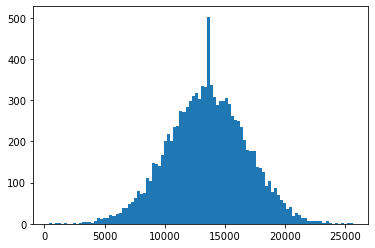

In [159]:
plt.hist(df['length'], bins=100)
plt.show

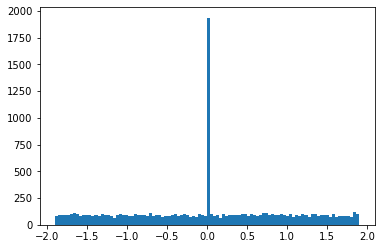

In [173]:
plt.hist(df['height'], bins = 100)
plt.show()

## Large concentration about the mean. 

In [168]:
df['lengthzscore']=zscore(df['length'])

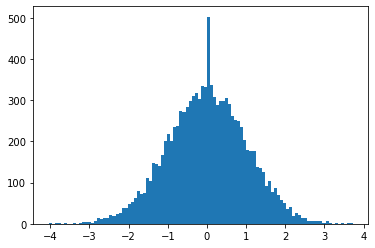

In [171]:
plt.hist(df['lengthzscore'],bins=100)
plt.show()

In [174]:
df.columns

Index(['convention', 'height', 'max', 'number', 'usage', 'region', 'length',
       'code', 'power', 'weight', 'country', 'target', 'ratio', 'cat2_CA-0',
       'cat2_CA-1', 'cat2_CA-10', 'cat2_CA-11', 'cat2_CA-12', 'cat2_CA-13',
       'cat2_CA-14', 'cat2_CA-15', 'cat2_CA-16', 'cat2_CA-17', 'cat2_CA-18',
       'cat2_CA-19', 'cat2_CA-1A', 'cat2_CA-1B', 'cat2_CA-1C', 'cat2_CA-1D',
       'cat2_CA-1E', 'cat2_CA-1F', 'cat2_CA-2', 'cat2_CA-20', 'cat2_CA-21',
       'cat2_CA-22', 'cat2_CA-23', 'cat2_CA-24', 'cat2_CA-25', 'cat2_CA-26',
       'cat2_CA-27', 'cat2_CA-3', 'cat2_CA-4', 'cat2_CA-5', 'cat2_CA-6',
       'cat2_CA-7', 'cat2_CA-8', 'cat2_CA-9', 'cat2_CA-A', 'cat2_CA-B',
       'cat2_CA-C', 'cat2_CA-D', 'cat2_CA-E', 'cat2_CA-F', 'item_IT-0',
       'item_IT-1', 'item_IT-10', 'item_IT-11', 'item_IT-12', 'item_IT-13',
       'item_IT-14', 'item_IT-15', 'item_IT-16', 'item_IT-17', 'item_IT-18',
       'item_IT-19', 'item_IT-1A', 'item_IT-1B', 'item_IT-1C', 'item_IT-1D',
       'item_IT-